# Notebook to examine extinction in Galacticus SEDs for DC2

The colors of cosmoDC2 galaxies have several peculiarities when compared to e.g. the Michael Brown SEDs or most Bruzual-Charlot SEDs.  Of partiucular note is a tendancy for galaxies to have restframe colors that are too red in i-z and too blue in z-y.  (see the green oval in the picture attached below).
You can see this effect in Bryce's notebook, available here:
https://github.com/LSSTDESC/pz_pdf/blob/issue/2/templates_for_DC2/doc/notebooks/extrapolated_dc2_templates.ipynb

We will look at some of those galaxies to try to find any potential problems.  In particular, we will look at the reddenning law applied by Galacticus by comparing the 30-band extincted to the 30-band unextincted SEDs

Here are *restframe* color-color diagrams (colors at z=0) from Bryce's notebook after his PCA/GP process has tried to adjust the templates.  Note in the z-y_rest vs i-z_rest plot in the lower right how all of the red galaxies are much bluer in z-y than the templates want them to be.  No templates that we've tried seem to fill in this space, the colors just aren't typical of realistic galaxies


In [1]:
%%html
<img src="figs/Bryce_colcol.png">


In [2]:
import sys
sys.path.append('/global/homes/s/schmidt9/.local/lib/python3.6/site-packages/')

In [3]:
import os
import numpy as np
import GCRCatalogs
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
#catalog = GCRCatalogs.load_catalog('cosmoDC2_v1.0_9556')
catalog = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

set up the column names to read in the 30-band tophat filters that describe the SED

In [6]:
sed_label = []
sed_min_wave = []
sed_wave_width = []
for quant_label in sorted(catalog.list_all_quantities()):
    if (quant_label.startswith('sed') and quant_label.endswith('bulge')):
        sed_label.append(quant_label.rstrip('_bulge'))
        label_split = quant_label.split('_')
        sed_min_wave.append(int(label_split[1]))
        sed_wave_width.append(int(label_split[2]))
bin_order = np.argsort(sed_min_wave)
sed_label = np.array(sed_label)[bin_order]
sed_min_wave = np.array(sed_min_wave)[bin_order]
sed_wave_width = np.array(sed_wave_width)[bin_order]
sed_min_wave = np.unique(sed_min_wave)
sed_wave_width = np.unique(sed_wave_width)

In [7]:
print (sed_min_wave)
print(sed_wave_width)
print (sed_label)

[ 1000  1246  1552  1933  2407  2998  3184  3381  3590  3812  4048  4299
  4565  4848  5148  5467  5806  6166  6548  6954  7385  7843  8329  8846
  9395  9978 11467 13177 15143 17402]
[ 186  197  209  222  236  246  251  266  283  300  306  319  339  360
  381  382  406  431  458  474  486  517  549  583  591 1489 1710 1966
 2259 2596]
['sed_1000_246' 'sed_1246_306' 'sed_1552_381' 'sed_1933_474'
 'sed_2407_591' 'sed_2998_186' 'sed_3184_197' 'sed_3381_209'
 'sed_3590_222' 'sed_3812_236' 'sed_4048_251' 'sed_4299_266'
 'sed_4565_283' 'sed_4848_300' 'sed_5148_319' 'sed_5467_339'
 'sed_5806_360' 'sed_6166_382' 'sed_6548_406' 'sed_6954_431'
 'sed_7385_458' 'sed_7843_486' 'sed_8329_517' 'sed_8846_549'
 'sed_9395_583' 'sed_9978_1489' 'sed_11467_1710' 'sed_13177_1966'
 'sed_15143_2259' 'sed_17402_2596']


In [8]:
sed_label_noext = ["%s_no_host_extinction"%(sed) for sed in sed_label]
print (sed_label_noext)

['sed_1000_246_no_host_extinction', 'sed_1246_306_no_host_extinction', 'sed_1552_381_no_host_extinction', 'sed_1933_474_no_host_extinction', 'sed_2407_591_no_host_extinction', 'sed_2998_186_no_host_extinction', 'sed_3184_197_no_host_extinction', 'sed_3381_209_no_host_extinction', 'sed_3590_222_no_host_extinction', 'sed_3812_236_no_host_extinction', 'sed_4048_251_no_host_extinction', 'sed_4299_266_no_host_extinction', 'sed_4565_283_no_host_extinction', 'sed_4848_300_no_host_extinction', 'sed_5148_319_no_host_extinction', 'sed_5467_339_no_host_extinction', 'sed_5806_360_no_host_extinction', 'sed_6166_382_no_host_extinction', 'sed_6548_406_no_host_extinction', 'sed_6954_431_no_host_extinction', 'sed_7385_458_no_host_extinction', 'sed_7843_486_no_host_extinction', 'sed_8329_517_no_host_extinction', 'sed_8846_549_no_host_extinction', 'sed_9395_583_no_host_extinction', 'sed_9978_1489_no_host_extinction', 'sed_11467_1710_no_host_extinction', 'sed_13177_1966_no_host_extinction', 'sed_15143_225

Grab some quantities from the GCRCatalog, note that we are grabbing *rest frame* quantities, not observed quantities, so color-color diagrams and such may look slightly different than we usually expect

In [9]:
magcolumns = ['Mag_true_u_lsst_z0', 'Mag_true_g_lsst_z0', 'Mag_true_r_lsst_z0',
                'Mag_true_i_lsst_z0', 'Mag_true_z_lsst_z0', 'Mag_true_Y_lsst_z0',
                'LSST_filters/magnitude:LSST_i:observed:dustAtlas','mag_true_i_lsst','redshift','A_v']


In [10]:
newcolumns = np.concatenate((sed_label,sed_label_noext,magcolumns),axis=None)

In [11]:
data = catalog.get_quantities(newcolumns, filters = ['mag_true_i_lsst < 25.3'])
print (len(data['Mag_true_u_lsst_z0']))

10404449


In [12]:
u_g = data['Mag_true_u_lsst_z0'] - data['Mag_true_g_lsst_z0']
g_r = data['Mag_true_g_lsst_z0'] - data['Mag_true_r_lsst_z0']
r_i = data['Mag_true_r_lsst_z0'] - data['Mag_true_i_lsst_z0']
i_z = data['Mag_true_i_lsst_z0'] - data['Mag_true_z_lsst_z0']
z_y = data['Mag_true_z_lsst_z0'] - data['Mag_true_Y_lsst_z0']

define the bin centers for plotting purposes

In [13]:
bin_centers = []
for xbin in sed_label:
    parts = xbin.split('_')
    bin_centers.append(float(parts[1])+0.5*float(parts[2]))
print (bin_centers)

[1123.0, 1399.0, 1742.5, 2170.0, 2702.5, 3091.0, 3282.5, 3485.5, 3701.0, 3930.0, 4173.5, 4432.0, 4706.5, 4998.0, 5307.5, 5636.5, 5986.0, 6357.0, 6751.0, 7169.5, 7614.0, 8086.0, 8587.5, 9120.5, 9686.5, 10722.5, 12322.0, 14160.0, 16272.5, 18700.0]


Text(0,0.5,'z-y rest')

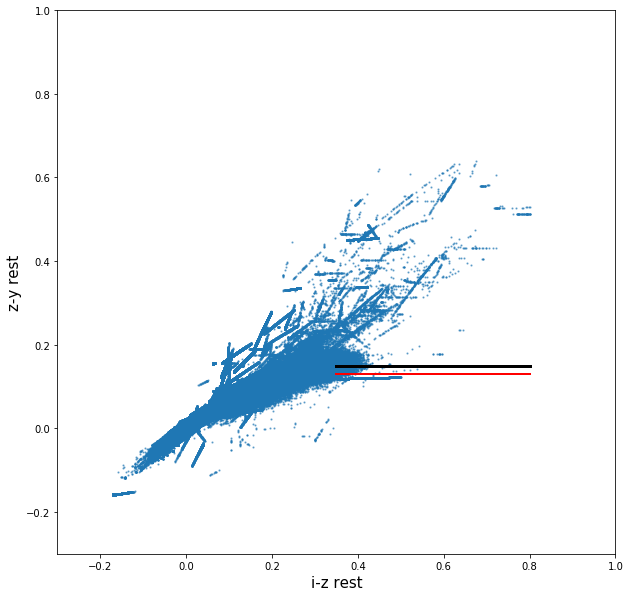

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(i_z,z_y,marker='.',s=6,alpha=.5)
plt.plot([.35,.8],[.15,.15],lw=3,c='k')
plt.plot([.35,.8],[.13,.13],lw=2,c='r')
plt.xlim([-.3,1])
plt.ylim([-.3,1])
plt.xlabel("i-z rest",fontsize=15)
plt.ylabel("z-y rest",fontsize=15)

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(data)

let's limit ourselves to a particluar small color region in the too blue z-y space.  Add a cut at z-y>.13 to avoid the peculiar line of near constant z-y color at .11-.12, as that may be something else.

In [17]:
#mask = np.logical_and(i_z<.2,np.logical_and(z_y>0,np.logical_and(z_y<.1,i_z>.1))) #"normal"galaxies
#mask = np.logical_and(i_z>0.35,np.logical_and(z_y<0.15,z_y>0.13))
mask = np.logical_and(i_z>0.35,np.logical_and(z_y<0.15,z_y>0.13)) #high extinction galaxies?

In retrospect, seeing that these are very red galaxies, maybe they are peculiar in their (derived, not native, but likely indicative of high dust) Av values.  Select out the highest and lowest Av values and see where they fall on the z-y_rest vs i-z_rest color-color plot

In [18]:
avmask = (df['A_v']>2.0)
lowavmask = (df['A_v']<.01)

In [19]:
avdf = df[avmask][::10]
lowavdf = df[lowavmask][::10]

In [20]:
#avdf.info()

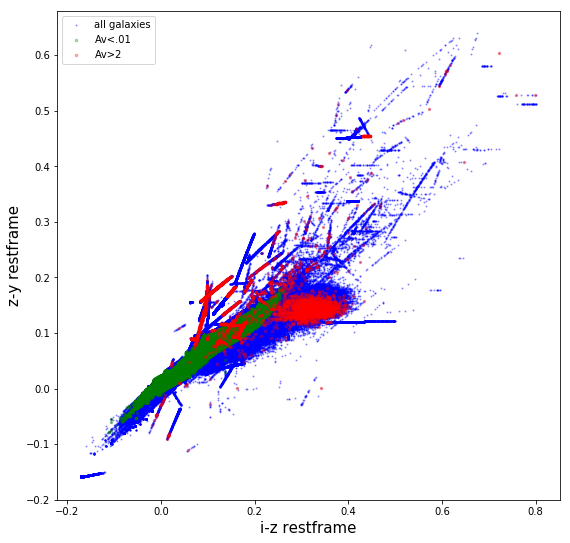

In [21]:
fig = plt.figure(figsize=(9,9))
plt.scatter(i_z,z_y,marker='.',s=5,c='b',label = "all galaxies",alpha=0.3)
plt.scatter(lowavdf['Mag_true_i_lsst_z0']-lowavdf['Mag_true_z_lsst_z0'],
            lowavdf['Mag_true_z_lsst_z0']-lowavdf['Mag_true_Y_lsst_z0'],marker = '.',s=25,c='g',label="Av<.01",alpha=0.3 )
plt.scatter(avdf['Mag_true_i_lsst_z0']-avdf['Mag_true_z_lsst_z0'],
            avdf['Mag_true_z_lsst_z0']-avdf['Mag_true_Y_lsst_z0'],marker = '.',s=25,c='r',label="Av>2",alpha=0.3 )
plt.legend(loc='upper left',fontsize=10)
plt.xlabel("i-z restframe",fontsize=15)
plt.ylabel("z-y restframe",fontsize=15)
plt.savefig("zy_iz_rest_Avcoded.jpg",fmt="jpg")

Yep, the highest extinction objects occupy this same area of color space, could be related.  To confirm, plot our little color slice's Av distribution.  They are mainly high values.

In [29]:
cutdf = df[mask]#[::87]

In [23]:
cutav = cutdf['A_v']

(array([3., 0., 0., 0., 7., 5., 6., 2., 3., 2.]),
 array([1.53867066, 1.65160056, 1.76453047, 1.87746037, 1.99039028,
        2.10332018, 2.21625009, 2.32917999, 2.44210989, 2.5550398 ,
        2.6679697 ]),
 <a list of 10 Patch objects>)

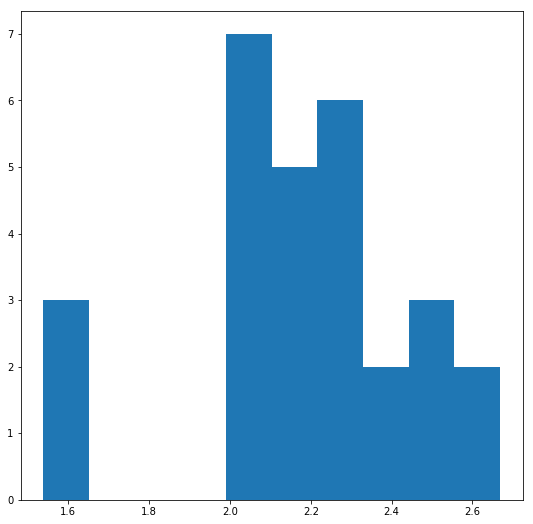

In [24]:
fig = plt.figure(figsize=(9,9))
plt.hist(cutav)

In [25]:
#cutdf.info()

Look at a couple individual SEDs extincted vs unextincted.  Just grab their loc values one at a time for now

In [26]:
cutdf.head()

,sed_9978_1489,sed_15143_2259,sed_2407_591,sed_17402_2596,sed_5148_319_no_host_extinction,sed_5806_360,sed_3812_236_no_host_extinction,sed_9395_583_no_host_extinction,sed_8846_549,sed_15143_2259_no_host_extinction,...,sed_6166_382_no_host_extinction,sed_3812_236,sed_5467_339_no_host_extinction,sed_5148_319,sed_8329_517_no_host_extinction,sed_17402_2596_no_host_extinction,sed_5467_339,sed_11467_1710,sed_6166_382,sed_6954_431_no_host_extinction
2000,5136176.0,8077706.0,60445.351562,7372040.0,12836525.0,2065380.500,6853444.0,26126988.0,4591392.50,32876964.0,...,16415958.0,427590.37500,14410554.0,1511887.250,22766804.0,29427492.0,1827898.375,5451645.5,2233347.750,18418232.0
47899,5045612.5,8262385.5,56954.613281,7612704.5,9780184.0,2018157.250,4834505.5,20750370.0,4493823.00,26349642.0,...,12779654.0,414741.28125,11083182.0,1466767.625,18056798.0,23559420.0,1789761.125,5386205.5,2181753.500,14470580.0
399636,5742371.5,9157904.0,79912.132812,8299634.5,17822122.0,2334064.500,10255785.0,33992664.0,5150835.50,41907984.0,...,22179498.0,524180.46875,19751778.0,1726478.750,29920036.0,37319944.0,2073268.250,6107595.5,2520735.750,24636308.0
431779,4557276.5,7517850.5,45058.035156,6869966.5,10306402.0,1799535.125,5074819.0,21884510.0,4064266.25,27830832.0,...,13470045.0,361007.53125,11684281.0,1295978.250,19013416.0,24894900.0,1592305.750,4851568.0,1947400.125,15241656.0
786092,5871016.0,9446748.0,66575.843750,8766833.0,12617619.0,2300861.750,6172043.0,27142140.0,5203354.50,34569184.0,...,16574252.0,468165.06250,14336418.0,1672629.000,23558742.0,30966810.0,2032647.250,6279564.5,2493871.750,18804178.0


In [30]:
cutid = 449339

In [31]:
single = cutdf.loc[cutid]

In [32]:
single_z = single['redshift']
print ("redshift: %f"%single_z)
single_flux = []
single_flux_noext = []
for lab in sed_label:
    single_flux.append(single[lab])
for lab in sed_label_noext:
    single_flux_noext.append(single[lab])

redshift: 0.378651


magnitudes are in unites of f_nu, want to convert to f_lambda units, as that is how I am used to visualizing SEDs, just do a c/lam^2 (ignore c since I'm normalizing to last bin anyway)

In [33]:
flam = [single_flux[i]/(bin_centers[i]*bin_centers[i]) for i,x in enumerate(single_flux)]
flam_noext = [x/(bin_centers[i]*bin_centers[i]) for i,x in enumerate(single_flux_noext)]
#normalize at 7614 angstroms, which is bin 21
#notmalize at 9120.5 angstomrs, which is bin 24
norm = flam[29]
flam /= norm
norm_noext = flam_noext[29]
flam_noext /=norm_noext

Text(0,0.5,'Flambda')

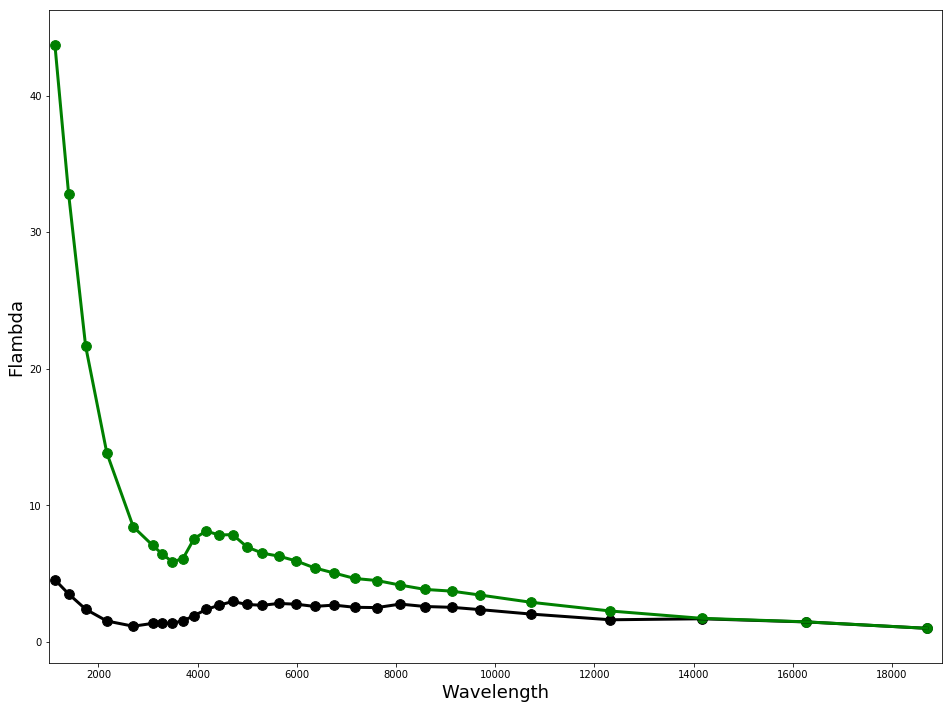

In [34]:
fig = plt.figure(figsize=(16,12))
plt.plot(bin_centers,flam,lw=3,c='k',label ="extincted")
plt.plot(bin_centers,flam_noext,lw=3,c='g',label="unextincted")
plt.scatter(bin_centers,flam,marker='o',s=95,c='k')
plt.scatter(bin_centers,flam_noext,marker='o',s=95,c='g')
plt.xlim([1000.,19000.])
plt.xlabel('Wavelength',fontsize=18)
plt.ylabel('Flambda',fontsize=18)
#plt.savefig("243206_sedplot.jpg",fmt="jpg")

Note the little "bump"/upturn at ~7500-8000 angstroms in the black line, that does not look like a realistic galaxy feature.

Let's compare the ratio of fluxes to what we expect for a couple of dust laws.  For simplicity, grab the pyextinction package from github with:<br> `git clone https://github.com/mfouesneau/pyextinction.git` <br> and install locally

In [35]:
sys.path.append('/global/u2/s/schmidt9/PACKAGES/pyextinction')
import pyextinction as pyext
from pyextinction import unit

In [36]:
av = 1.1
#laws = (pyext.Cardelli(),pyext.Fitzpatrick99())
laws = (pyext.Cardelli(),pyext.Gordon03_SMCBar())
Rvs = [3.1,3.1]
x = np.arange(1120.,18800.,200.)
lam = x*unit['angstrom']
colors = ['red','blue']


the ratio of the fluxes is related to the alambda/av by <br> fobs = fintrinsic*10^(-0.4*Alam) <br>  where <br>Alam = k(lam)*Av/Rv <br> So, we can work out that the ratio is fintrinsic/fobs = 10^0.4*Alam

Text(0,0.5,'Fintrinsic/Fobserved')

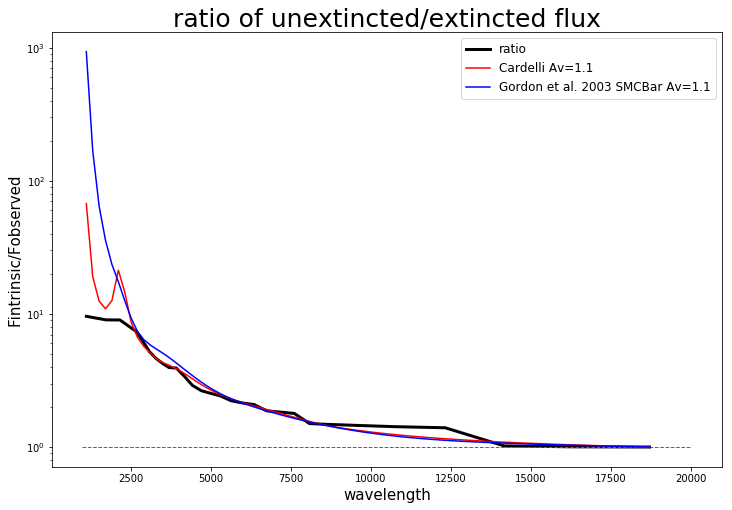

In [37]:
ratio = [x/y for x,y in zip(flam_noext,flam)]
fig = plt.figure(figsize=(12,8))
plt.semilogy(bin_centers, ratio,lw=3,c='k',label = "ratio")
#plt.scatter(bin_centers,ratio,marker='o',s=95,c='k')
plt.semilogy([1000,20000],[1.,1.],lw=1,linestyle='--')
for law,col,Rv in zip(laws,colors,Rvs):
    alam = law(lam,Av=av,Rv=Rv)
    lawratio = np.power(10.,0.4*alam)
    lawratio /= lawratio[-1] #normalize to 1 in last bin
    xlabel = "{} Av={}".format(law.name,av)
    plt.semilogy(x,lawratio,label=xlabel,c=col)
plt.title("ratio of unextincted/extincted flux",fontsize=25)
#plt.ylim([0.2,5])
plt.legend(loc='upper right',fontsize=12)
plt.xlabel("wavelength",fontsize=15)
plt.ylabel("Fintrinsic/Fobserved",fontsize=15)
#plt.savefig("243206_fluxratio.jpg",fmt="jpg")

The pattern shown above, where for high extinction objects, the ratio shows sharp jumps at ~8000 and ~14000 angstroms and a plateau at ~8000-12000 angstroms is very common.  The "bump" near 8000 and plateau at 8000-120000 angstroms induces the strange redder i-z and bluer z-y colors that we see in the plots.  I'm guessing that some of the other departures may also contribute to some of the strange colors that we're seeing, e.g. the anomalous ratio at the blue end, but I haven't looked in to that yet.


In contrast, compare to a "normal" galaxy with low extinction.  I looked up a galaxy from the main bluer area of the z-y vs i-z plane, id 13998 (just to pick one at random)

In [38]:
normalid = 13998 
normalgal = df.loc[normalid]

In [39]:
normal_flux = []
normal_flux_noext = []
for lab in sed_label:
    normal_flux.append(normalgal[lab])
for lab in sed_label_noext:
    normal_flux_noext.append(normalgal[lab])
    
xflam = [x/(bin_centers[i]*bin_centers[i]) for i,x in enumerate(normal_flux)]
xflam_noext = [x/(bin_centers[i]*bin_centers[i]) for i,x in enumerate(normal_flux_noext)]
xnorm = xflam[29]
xflam /= xnorm
xnorm_noext = xflam_noext[29]
xflam_noext /=xnorm_noext

Text(0,0.5,'Flambda')

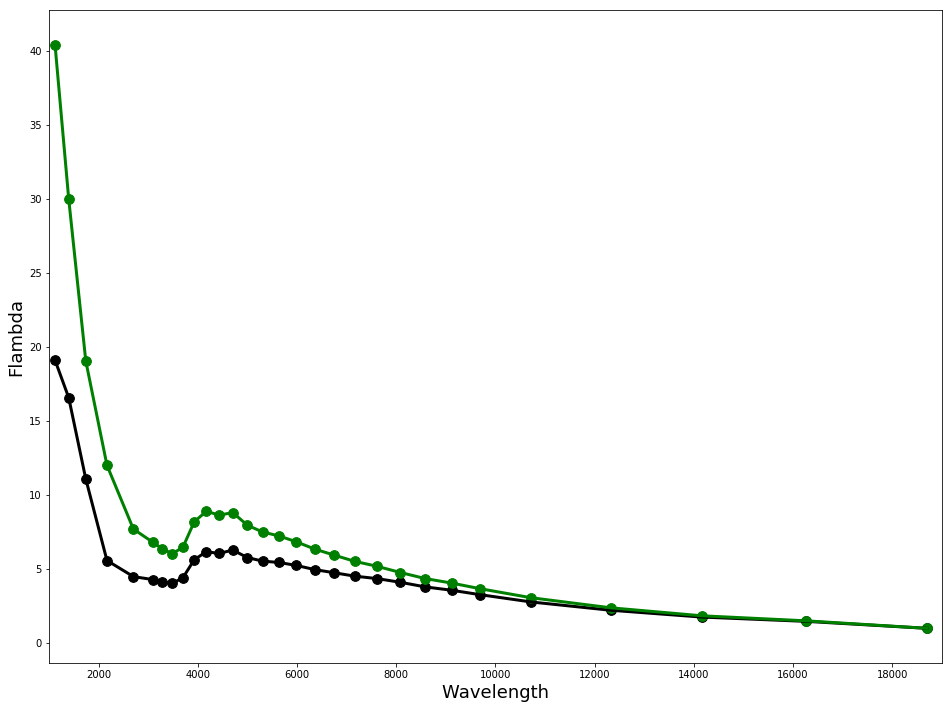

In [40]:
fig = plt.figure(figsize=(16,12))
plt.plot(bin_centers,xflam,lw=3,c='k',label ="extincted")
plt.plot(bin_centers,xflam_noext,lw=3,c='g',label="unextincted")
plt.scatter(bin_centers,xflam,marker='o',s=95,c='k')
plt.scatter(bin_centers,xflam_noext,marker='o',s=95,c='g')
plt.xlim([1000.,19000.])
plt.xlabel('Wavelength',fontsize=18)
plt.ylabel('Flambda',fontsize=18)
#plt.savefig("243206_sedplot.jpg",fmt="jpg")

There is visually no extra "bump" induced near 8000 angstroms, good sign!

Text(0,0.5,'Fintrinsic/Fobserved')

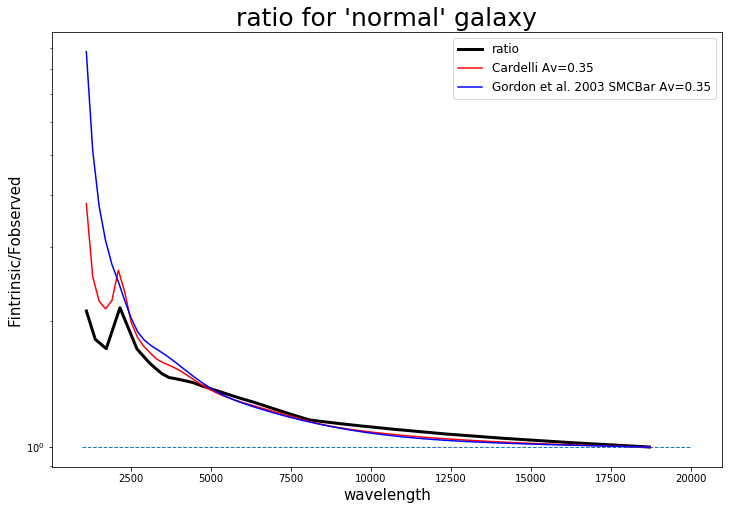

In [41]:
lowav = 0.35

ratio = [x/y for x,y in zip(xflam_noext,xflam)]
fig = plt.figure(figsize=(12,8))
plt.semilogy(bin_centers, ratio,lw=3,c='k',label = "ratio")
#plt.scatter(bin_centers,ratio,marker='o',s=95,c='k')
plt.semilogy([1000,20000],[1.,1.],lw=1,linestyle='--')
for law,col,Rv in zip(laws,colors,Rvs):
    alam = law(lam,Av=lowav,Rv=Rv)
    lawratio = np.power(10.,0.4*alam)
    lawratio /= lawratio[-1] #normalize to 1 in last bin
    xlabel = "{} Av={}".format(law.name,lowav)
    plt.semilogy(x,lawratio,label=xlabel,c=col)
plt.title("ratio for 'normal' galaxy",fontsize=25)
#plt.ylim([0.2,5])
plt.legend(loc='upper right',fontsize=12)
plt.xlabel("wavelength",fontsize=15)
plt.ylabel("Fintrinsic/Fobserved",fontsize=15)
#plt.savefig("243206_fluxratio.jpg",fmt="jpg")

There is still a break near 8000 Angstroms, but since the amount of dust is lower, the effect on the colors isn't as bad as at high Av.  The ratio looks much more like we expect it as well, with the Cardelli/Fitzpatrick-like feature at 2500 angstroms (which is not the case at high Av, when the ratio goes a bit nuts in the blue)

In [ ]:
#outfile = "ext_unext_SED_%d.dat"%cutid
#print (outfile)
#outfp = open(outfile,"w")

In [ ]:
#for wl,fl,flx,rat in zip(bin_centers,flam,flam_noext,ratio):
#    outfp.write("%.3f %.5g %.5g %.5g\n"%(wl,fl,flx,rat))
#outfp.close()